In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns                                              #importing modules 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
df1 = pd.read_csv(r"GlobalLandTemperaturesByMajorCity.csv")        #read dataset

In [36]:
df1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [37]:
df1.describe()                                                    #describing arttibutes of the dataset, there is only 2 int data attributes

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [38]:
df1.corr()                                                     #corrilation between attributes

,AverageTemperature,AverageTemperatureUncertainty
AverageTemperature,1.00000,-0.19938
AverageTemperatureUncertainty,-0.19938,1.00000


In [39]:
city = df1.drop_duplicates(['City'])     #to count how much city do we have at all
city

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1977,1850-01-01,15.986,1.537,Addis Abeba,Ethiopia,8.84N,38.11E
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
6555,1791-05-01,20.836,1.993,Aleppo,Syria,36.17N,37.79E
9224,1791-05-01,20.772,1.848,Alexandria,Egypt,31.35N,30.16E
...,...,...,...,...,...,...,...
227665,1845-01-01,2.377,2.006,Tokyo,Japan,36.17N,139.23E
229690,1743-11-01,-0.106,1.905,Toronto,Canada,44.20N,80.50W
232929,1859-01-01,22.286,2.118,Umm Durman,Sudan,15.27N,32.50E
234786,1841-01-01,2.734,2.772,Wuhan,China,29.74N,114.46E


([<matplotlib.patches.Wedge at 0x20bf166d190>,
 [Text(-1.097243835778853, 0.077820079962112, 'not empty elements'),
  Text(1.0972438339573423, -0.07782010564495785, 'NaN elements')])

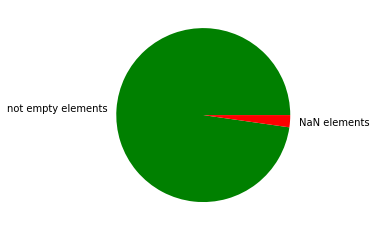

In [40]:
explodes = (0,0.3)
plt.pie(df1[df1['City']=='Moscow'].AverageTemperature.isna().value_counts(),colors=['green','red'],
   labels=['not empty elements','NaN elements'])

I have choosen Moscow city, because there is no Kz cities in dataset(

In [42]:
#i decided to fill empty data with previous
df1['AverageTemperature'] = df1.AverageTemperature.fillna(method='bfill')                         
df1['AverageTemperatureUncertainty'] = df1.AverageTemperatureUncertainty.fillna(method='bfill')

([<matplotlib.patches.Wedge at 0x20bf1f07e50>],
 [Text(-1.1, 1.3471114790620887e-16, 'not empty elements')])

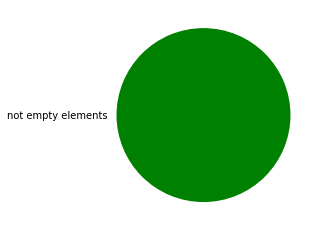

In [43]:
explodes = (0,0.3)
plt.pie(df1[df1['City']=='Moscow'].AverageTemperature.isna().value_counts(),colors=['green','red'],
   labels=['not empty elements'])

In [10]:
Moscow = df1[df1['City']=='Moscow']       #cutting DataFrame into smaller one
Moscow.head(10)   

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
155196,1743-11-01,-2.570,2.037,Moscow,Russia,55.45N,36.85E
155197,1743-12-01,6.555,2.544,Moscow,Russia,55.45N,36.85E
155198,1744-01-01,6.555,2.544,Moscow,Russia,55.45N,36.85E
155199,1744-02-01,6.555,2.544,Moscow,Russia,55.45N,36.85E
155200,1744-03-01,6.555,2.544,Moscow,Russia,55.45N,36.85E
155201,1744-04-01,6.555,2.544,Moscow,Russia,55.45N,36.85E
155202,1744-05-01,10.063,1.875,Moscow,Russia,55.45N,36.85E
155203,1744-06-01,15.393,1.732,Moscow,Russia,55.45N,36.85E
155204,1744-07-01,17.584,1.543,Moscow,Russia,55.45N,36.85E
155205,1744-08-01,10.765,1.590,Moscow,Russia,55.45N,36.85E


In [11]:
Moscow = Moscow.drop(['City', 'Country','Latitude','Longitude'], axis = 1)       #drop this data because it's same(location).

In [12]:
Moscow.head(10)                 #shows that every thing works fine

,dt,AverageTemperature,AverageTemperatureUncertainty
155196,1743-11-01,-2.570,2.037
155197,1743-12-01,6.555,2.544
155198,1744-01-01,6.555,2.544
155199,1744-02-01,6.555,2.544
155200,1744-03-01,6.555,2.544
155201,1744-04-01,6.555,2.544
155202,1744-05-01,10.063,1.875
155203,1744-06-01,15.393,1.732
155204,1744-07-01,17.584,1.543
155205,1744-08-01,10.765,1.590


Text(0, 0.5, 'Average Temperature')

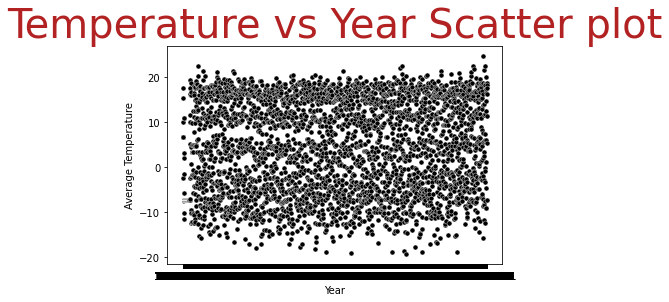

In [14]:
sns.scatterplot(x=Moscow.dt,y=Moscow.AverageTemperature,s=25,color='black')
plt.title('Temperature vs Year Scatter plot',color='firebrick',fontsize=40)       #plot that shows scatter
plt.xlabel('Year')
plt.ylabel('Average Temperature')

In [16]:
Moscow.corr()            #corrilation between data in Moscow

,AverageTemperature,AverageTemperatureUncertainty
AverageTemperature,1.000000,-0.144752
AverageTemperatureUncertainty,-0.144752,1.000000


In [25]:
X = Moscow.iloc[:, 1].values             #contains tempr
y = Moscow.iloc[:, -1].values           #contains uncertainty

In [26]:
X

array([-2.57 ,  6.555,  6.555, ..., 18.136, 17.485, 11.223])

In [27]:
y

array([2.037, 2.544, 2.544, ..., 0.276, 0.372, 2.037])

In [28]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [29]:
regressor = LinearRegression()      #implementation of Linear Regression
regressor.fit(X_train.reshape(len(X_train),1), y_train.reshape(len(y_train)))

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test.reshape(len(X_test),1))     #giving predition
np.set_printoptions(precision=3)

In [31]:
print(np.concatenate(y_pred.reshape(len(X_test),1)))

[1.904 1.186 1.65  1.82  1.679 1.549 1.602 1.453 1.34  1.683 1.211 1.195
 1.216 1.713 1.234 1.239 1.317 1.334 1.622 1.221 1.475 1.331 1.675 1.205
 1.248 1.549 1.761 1.84  1.203 1.232 1.765 1.724 1.198 1.112 1.182 1.307
 1.337 1.206 1.222 1.707 1.509 1.236 1.603 1.708 1.704 1.232 1.204 1.689
 1.473 1.365 1.254 1.243 1.585 1.555 1.359 1.442 1.246 1.474 1.679 1.709
 1.343 1.537 1.186 1.602 1.205 1.44  1.234 1.759 1.475 1.221 1.512 1.195
 1.766 1.199 1.692 1.179 1.643 1.211 1.22  1.589 1.207 1.431 1.246 1.28
 1.54  1.256 1.33  1.632 1.357 1.151 1.168 1.296 1.334 1.651 1.55  1.437
 1.185 1.452 1.752 1.721 1.472 1.184 1.236 1.496 1.125 1.671 1.475 1.215
 1.333 1.364 1.712 1.574 1.679 1.735 1.364 1.234 1.647 1.32  1.707 1.652
 1.184 1.661 1.581 1.6   1.621 1.241 1.755 1.31  1.18  1.7   1.275 1.576
 1.298 1.197 1.591 1.37  1.716 1.333 1.46  1.217 1.592 1.437 1.666 1.248
 1.238 1.414 1.421 1.253 1.696 1.623 1.354 1.158 1.498 1.23  1.6   1.318
 1.307 1.468 1.225 1.438 1.679 1.619 1.497 1.715 1.4